# Ice Cream Shop Revenue Prediction -Random Forest Regressor

To-Do - We have to predict the Revenue of the Ice Cream shop using the temperatures

* Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

* Importing Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [4]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Data Exploration

In [5]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


* Getting Statistical Data

In [6]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


* Getting basic information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


* Checking for NaN values

In [8]:
df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

# Data Visualization

* Getting relation b/w Temperature & Revenue

Text(0, 0.5, 'Revenue')

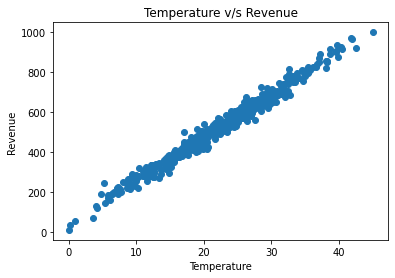

In [9]:
plt.scatter(df.Temperature,df.Revenue)
plt.title('Temperature v/s Revenue')
plt.xlabel("Temperature")
plt.ylabel("Revenue")


As the Temperature Increases, the Revenue also increases

* Getting Correlation

In [10]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


* Heatmap for the correlation

<AxesSubplot:>

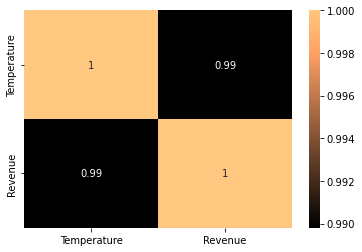

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='copper')

Strong Positive Correlation

* Boxplot for the Temp & Revenue

<AxesSubplot:>

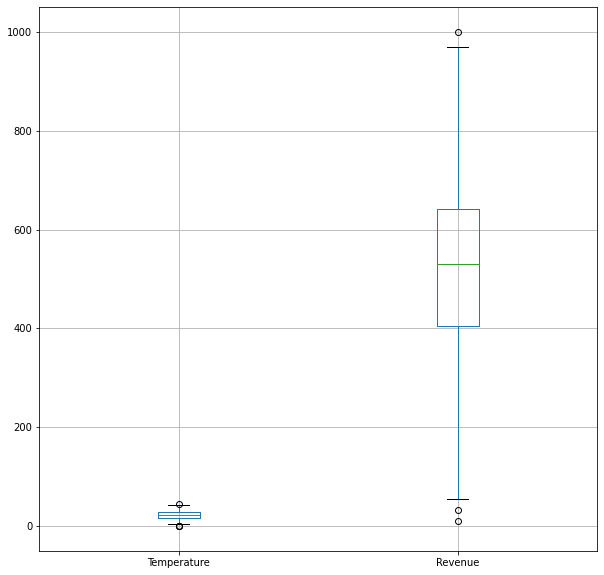

In [12]:
plt.figure(figsize=(10,10))
df.boxplot()


# Machine Learning

* Variablizing the data

In [21]:
x=np.array(df.Temperature).reshape(-1,1)
y=np.array(df.Revenue).reshape(-1,1)

* Splitting the data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

* Model Selection

In [19]:
model=RandomForestRegressor(random_state=0)

* Fitting the model

In [31]:
model.fit(x_train,y_train)

C:\Users\karan\AppData\Local\Temp\ipykernel_4596\1002171229.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(random_state=0)

# Performance Test

* Predicting the data

In [32]:
y_pred=model.predict(x_test)

* Veifying Predicted values

In [38]:
look=pd.DataFrame({"Actual Values":y_test.reshape(-1),'Predicted Values':y_pred})

In [39]:
look

,Actual Values,Predicted Values
0,714.560056,696.268895
1,579.307388,591.108472
2,651.861536,687.096327
3,284.772789,281.684879
4,432.819795,436.813710
5,501.345330,547.557695
6,454.189267,476.143563
7,356.098007,355.658351
8,473.568112,437.286215
9,704.281439,690.358911


* Plotting the Verification values

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

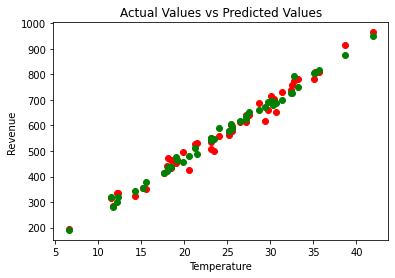

In [46]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Actual Values vs Predicted Values")

* Plotting the correlation b/w the Actual and Prdicted Values

<AxesSubplot:>

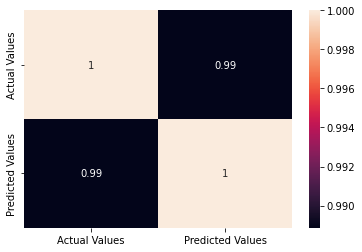

In [50]:
sns.heatmap(look.corr(),annot=True)

Strong Positive Correlation


* Accuracy Check

In [40]:
model.score(x_test,y_test)

0.9778423712689105

* R squared

In [51]:
r2_score(y_test,y_pred)

0.9778423712689105

* MSE

In [52]:
mean_squared_error(y_test,y_pred)

625.8849098050359

* MAE

In [53]:
mean_absolute_error(y_test,y_pred)

20.14649730229992